# Problem 1:

## Sparkling.csv Data

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [196]:
##importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py
py.init_notebook_mode()
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt



import os
os.getcwd()
os.chdir('C:\\Users\\harih\\Downloads\\Time Series Forecasting\\project')

### 1.1 Read the data as an appropriate Time Series data and plot the data.

In [197]:
sdf = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)
sdf = pd.DataFrame(sdf)

In [198]:
sdf.head(2)

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591

In [199]:
sdf.tail(2)

Sparkling
YearMonth            
1995-06-01       1688
1995-07-01       2031

In [200]:
sdf.shape

(187, 1)

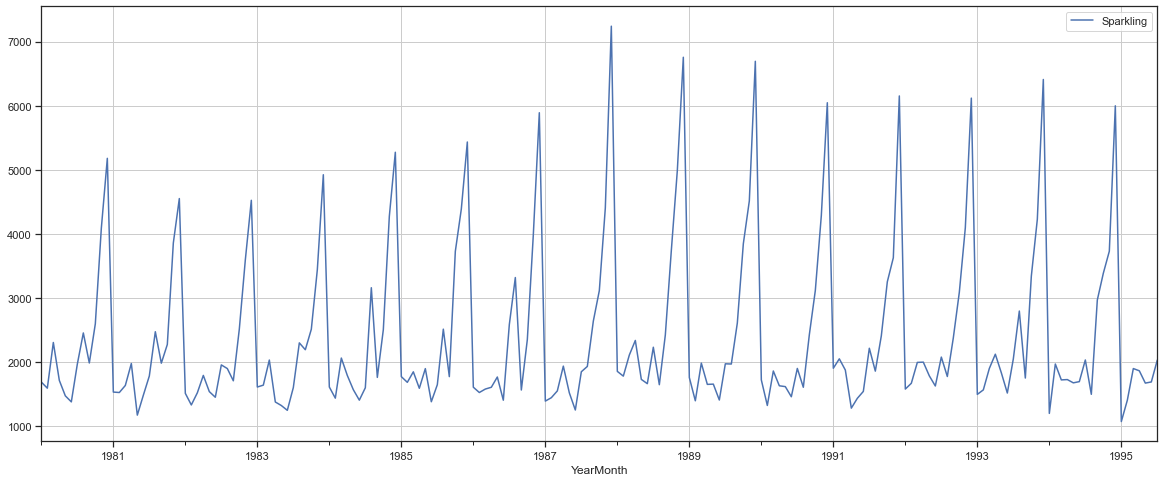

In [201]:
sdf.plot(figsize=(20,8))
plt.grid();

In [202]:
sdf['Year']=sdf.index.year
sdf['Month']=sdf.index.month
sdf.head()

Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5

In [203]:
sdf.shape

(187, 3)

In [204]:
sdf.columns=['Sales', 'Year', 'Month']

print ('**Head of the given Dataset**')
print(sdf.head())

print ('**Tail of the given Dataset**')
print(sdf.tail())

**Head of the given Dataset**
            Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5
**Tail of the given Dataset**
            Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-05-01   1670  1995      5
1995-06-01   1688  1995      6
1995-07-01   2031  1995      7


________________________________________________________________________________________________________________________________

### 1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Performing EDA

In [205]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   187 non-null    int64
 1   Year    187 non-null    int64
 2   Month   187 non-null    int64
dtypes: int64(3)
memory usage: 5.8 KB


In [206]:
sdf.isnull().sum()

Sales    0
Year     0
Month    0
dtype: int64

In [207]:
sdf.describe().T

count         mean          std     min     25%     50%     75%     max
Sales  187.0  2402.417112  1295.111540  1070.0  1605.0  1874.0  2549.0  7242.0
Year   187.0  1987.299465     4.514749  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.406417     3.450972     1.0     3.0     6.0     9.0    12.0

#### BoxPlot

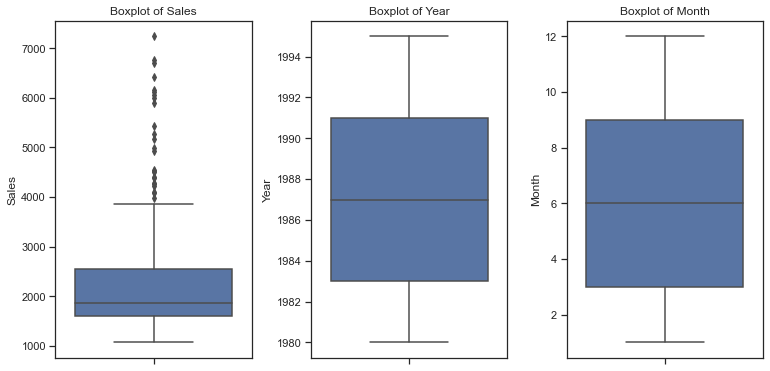

In [208]:
sdf_boxplot=sdf
plt.figure(figsize = (25,15))
feature_list = sdf_boxplot.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = sdf_boxplot[feature_list[i]], data = sdf_boxplot)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

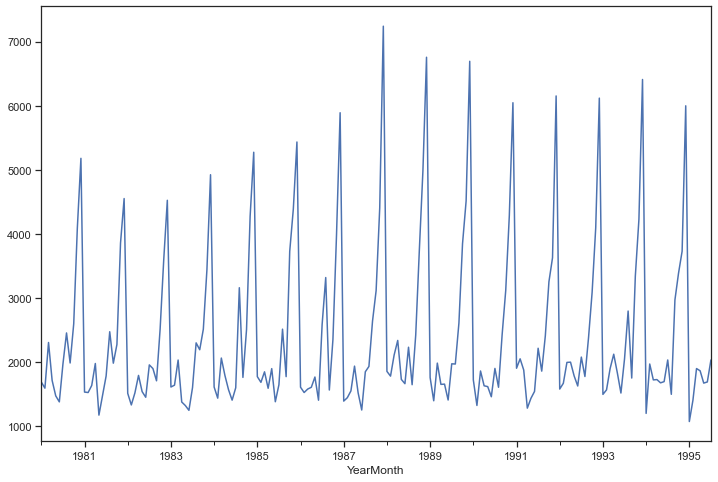

In [209]:
plt.figure(figsize=(12,8))
sdf['Sales'].plot();

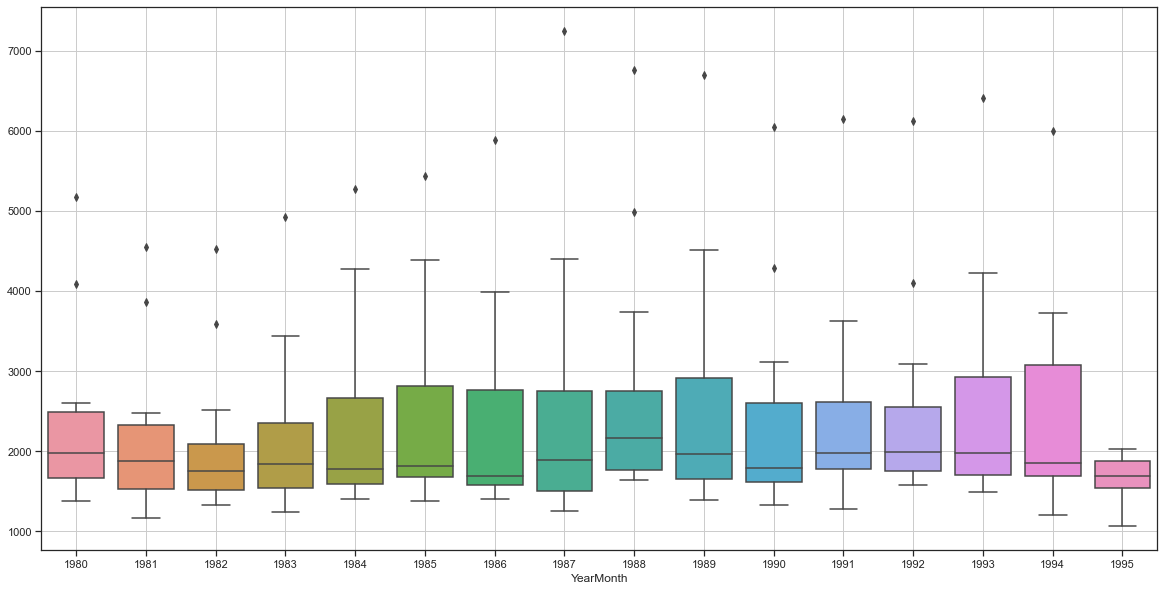

In [210]:
#Boxplot for year

_, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = sdf.index.year,y = sdf.values[:,0],ax=ax)
plt.grid();

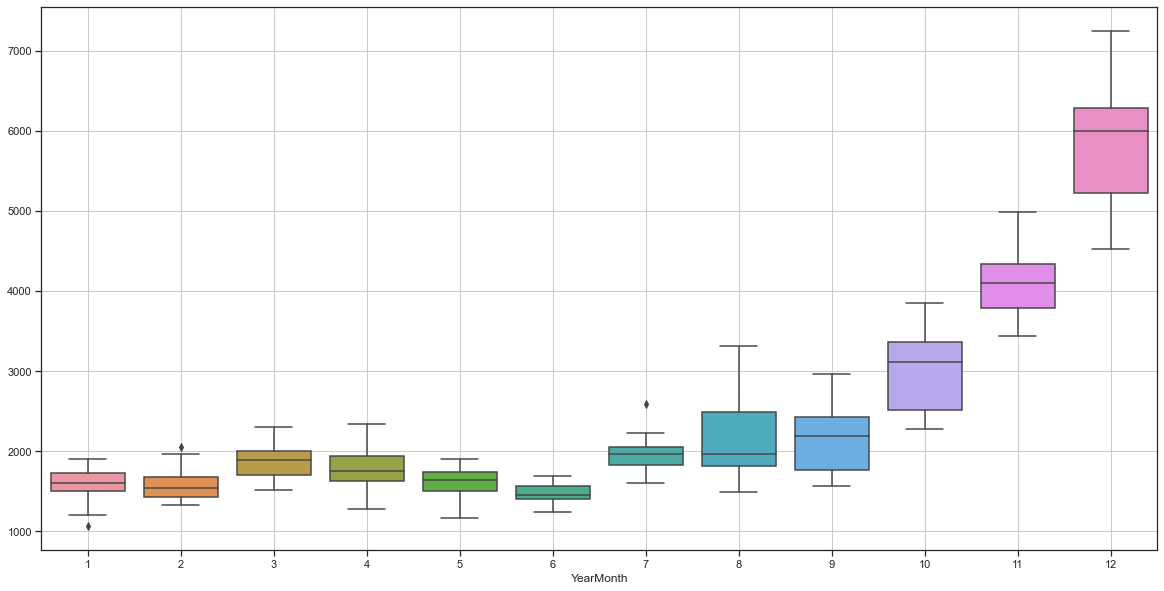

In [211]:
#Monthy Boxplot

_, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = sdf.index.month,y = sdf.values[:,0],ax=ax)
plt.grid();

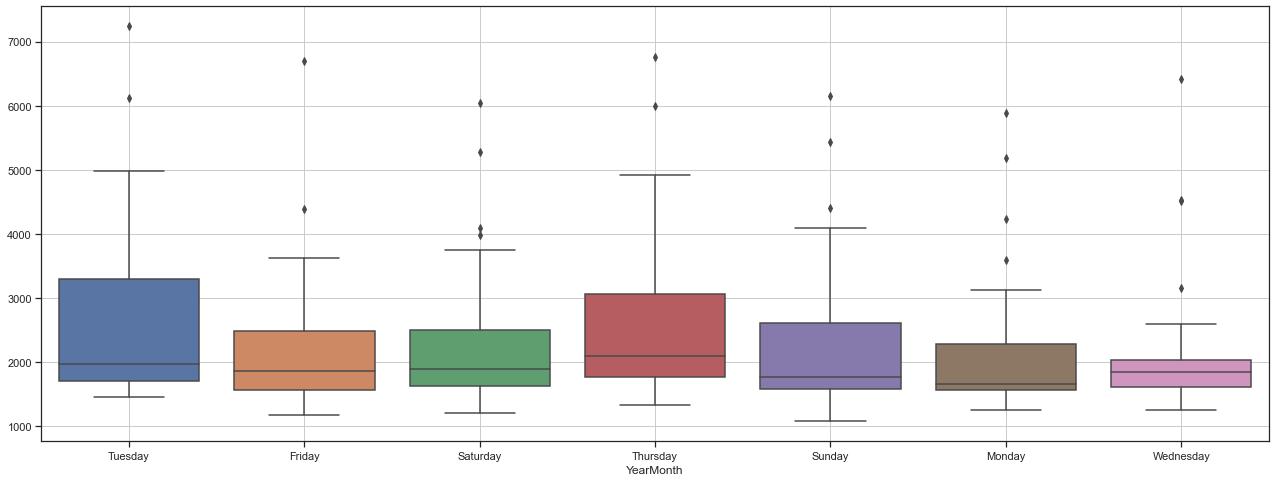

In [212]:
# Weekly Boxplot

_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = sdf.index.day_name(),y = sdf.values[:,0],ax=ax)
plt.grid();

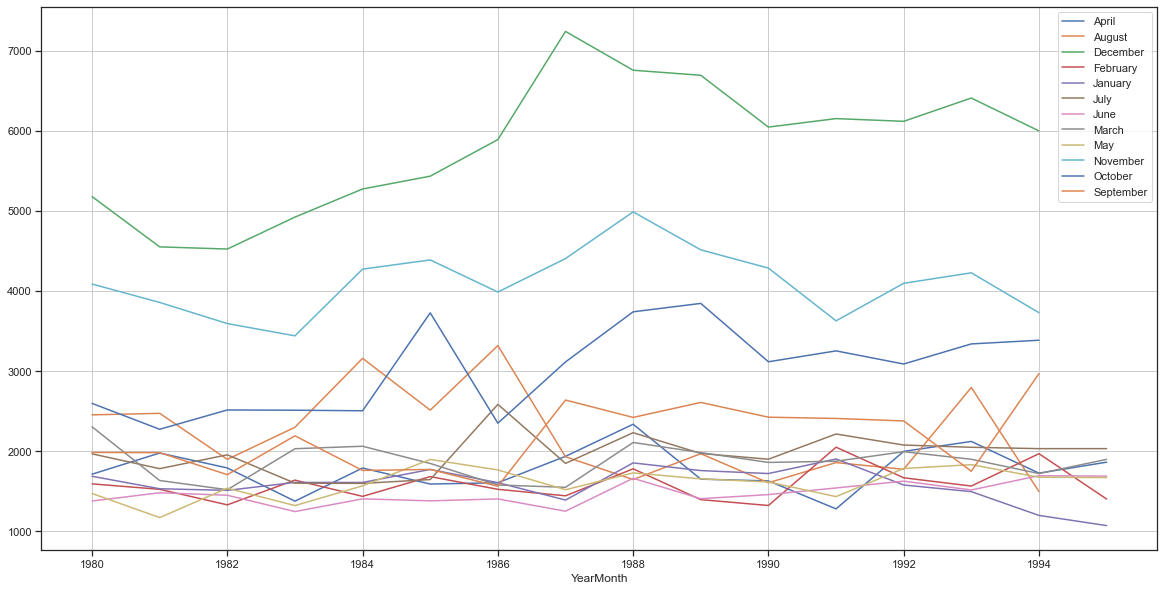

In [213]:
monthly_sales_across_years = pd.pivot_table(sdf, values = 'Sales', columns = sdf.index.month_name(), index = sdf.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

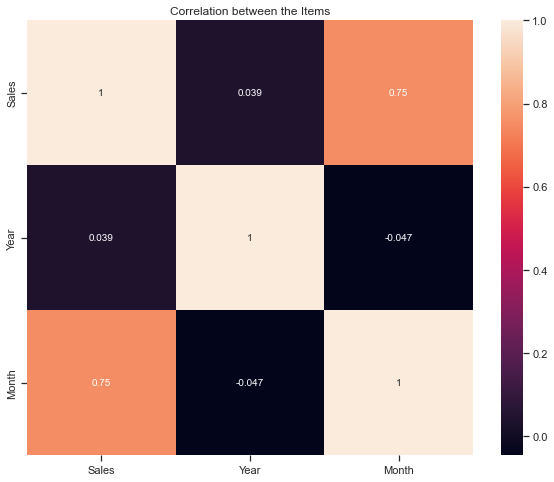

In [214]:
plt.figure(figsize=(10,8))
sns.heatmap(sdf.corr(),annot=True)
plt.title('Correlation between the Items');
plt.show()

In [215]:
sdf_decade_sum = sdf.resample('10Y').sum()
sdf_decade_sum

Sales    Year  Month
YearMonth                        
1980-12-31   28406   23760     78
1990-12-31  288893  238260    780
2000-12-31  131953  109605    340

### ECDF Plot :::. Empirical Cumulative Distribution Function

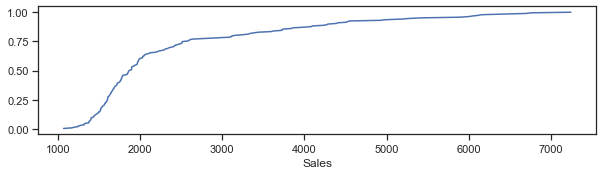

In [216]:
from statsmodels.distributions.empirical_distribution import ECDF

sns.set(style = "ticks") 
plt.figure(figsize = (10,8))

plt.subplot(312)
ecdf = ECDF(sdf['Sales'])
plt.plot(ecdf.x, ecdf.y, label = "statmodels")
plt.xlabel('Sales');

### Decomposing the Time Series

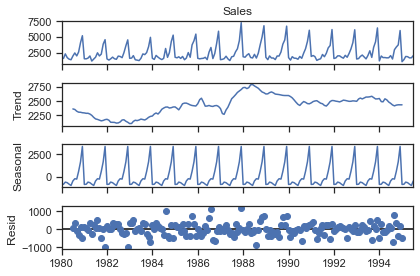

In [217]:
decomposition = seasonal_decompose(sdf['Sales'],model='additive')
decomposition.plot();

In [218]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2360.67
1980-08-01    2351.33
1980-09-01    2320.54
1980-10-01    2303.58
1980-11-01    2302.04
1980-12-01    2293.79
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.26
1980-02-01    -830.35
1980-03-01    -592.36
1980-04-01    -658.49
1980-05-01    -824.42
1980-06-01    -967.43
1980-07-01    -465.50
1980-08-01    -214.33
1980-09-01    -254.68
1980-10-01     599.77
1980-11-01    1675.07
1980-12-01    3386.98
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01     70.84
1980-08-01    316.00
1980-09-01    -81.86
1980-10-01   -307.35
1980-11-01    109.89
1980-12-01   -501.78
Name: resid, dtype: float64 



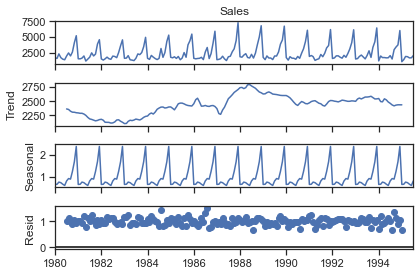

In [219]:
decomposition_mult = seasonal_decompose(sdf['Sales'],model='multiplicative')
decomposition_mult.plot();

In [220]:
trend = decomposition_mult.trend
seasonality = decomposition_mult.seasonal
residual = decomposition_mult.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

### MonthPlot for the Time Series

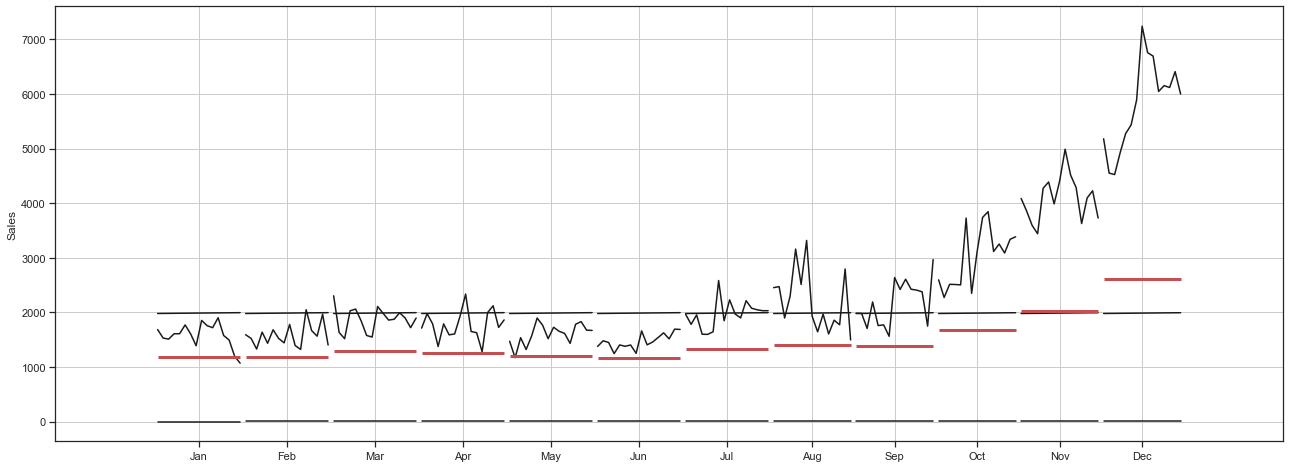

In [221]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(sdf,ylabel='Sales',ax=ax)
plt.grid();

### 1.3 Split the data into training and test. The test data should start in 1991.

In [222]:
# Splitting the data into training and testing sets

train = sdf[sdf.index < '1991-01-01']
test = sdf[sdf.index >= '1991-01-01']


print(train.shape)
print(test.shape)

(132, 3)
(55, 3)


In [223]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [224]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())


First few rows of Training Data


Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

Last few rows of Training Data


Sales  Year  Month
YearMonth                     
1990-08-01   1605  1990      8
1990-09-01   2424  1990      9
1990-10-01   3116  1990     10
1990-11-01   4286  1990     11
1990-12-01   6047  1990     12

First few rows of Test Data


Sales  Year  Month
YearMonth                     
1991-01-01   1902  1991      1
1991-02-01   2049  1991      2
1991-03-01   1874  1991      3
1991-04-01   1279  1991      4
1991-05-01   1432  1991      5

Last few rows of Test Data


Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-05-01   1670  1995      5
1995-06-01   1688  1995      6
1995-07-01   2031  1995      7

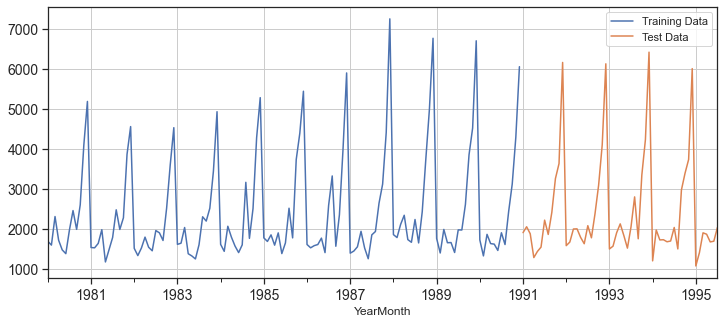

In [225]:
train['Sales'].plot(figsize=(12,5), fontsize=14)
test['Sales'].plot(figsize=(12,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 1.4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1: Linear Regression

In [226]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [227]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sales  Year  Month  time
YearMonth                           
1980-01-01   1686  1980      1     1
1980-02-01   1591  1980      2     2
1980-03-01   2304  1980      3     3
1980-04-01   1712  1980      4     4
1980-05-01   1471  1980      5     5 

Last few rows of Training Data 
             Sales  Year  Month  time
YearMonth                           
1990-08-01   1605  1990      8   128
1990-09-01   2424  1990      9   129
1990-10-01   3116  1990     10   130
1990-11-01   4286  1990     11   131
1990-12-01   6047  1990     12   132 

First few rows of Test Data 
             Sales  Year  Month  time
YearMonth                           
1991-01-01   1902  1991      1    43
1991-02-01   2049  1991      2    44
1991-03-01   1874  1991      3    45
1991-04-01   1279  1991      4    46
1991-05-01   1432  1991      5    47 

Last few rows of Test Data 
             Sales  Year  Month  time
YearMonth                           
1995-03-01   1897

In [228]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

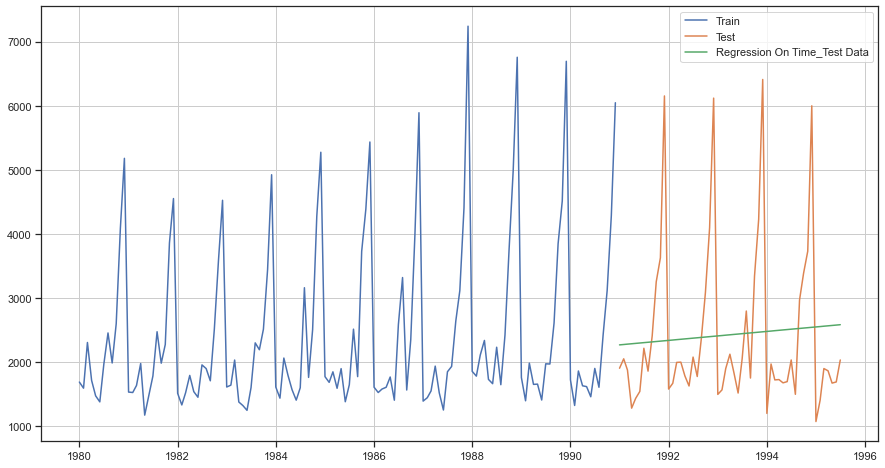

In [229]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(15,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [230]:
from sklearn import metrics

In [231]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
print("For Regression on Time forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For Regression on Time forecast on the Test Data,  RMSE is 1275.87


In [232]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1275.867052

#### Model 2: Naive Method

In [233]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [234]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

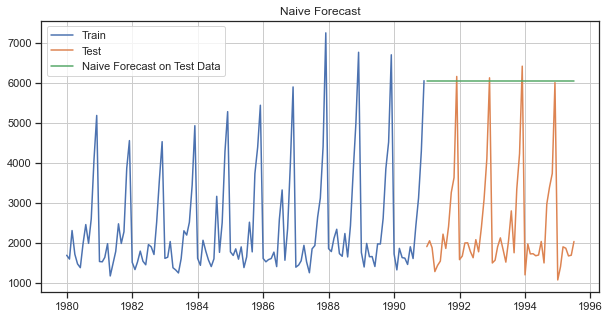

In [235]:
plt.figure(figsize=(10,5))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [236]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  1275.867052
Naive Model        3864.279352

### Model 3: Simple Average Method

In [237]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [238]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Sales  Year  Month  mean_forecast
YearMonth                                    
1991-01-01   1902  1991      1    2403.780303
1991-02-01   2049  1991      2    2403.780303
1991-03-01   1874  1991      3    2403.780303
1991-04-01   1279  1991      4    2403.780303
1991-05-01   1432  1991      5    2403.780303

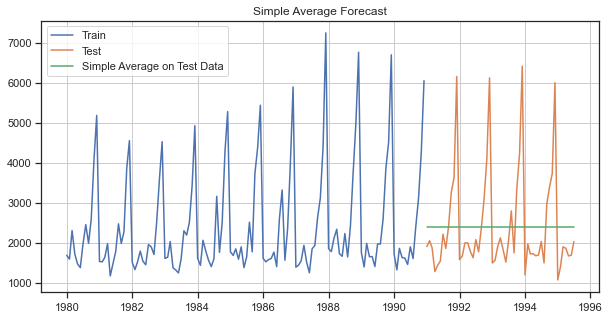

In [239]:
plt.figure(figsize=(10,5))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [240]:
rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression     1275.867052
Naive Model           3864.279352
Simple Average Model  1275.081804

### Model 4: Moving Average Method

In [241]:
MovingAverage = sdf.copy()
MovingAverage.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [242]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

Sales  Year  Month  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01   1686  1980      1         NaN         NaN         NaN         NaN
1980-02-01   1591  1980      2      1638.5         NaN         NaN         NaN
1980-03-01   2304  1980      3      1947.5         NaN         NaN         NaN
1980-04-01   1712  1980      4      2008.0     1823.25         NaN         NaN
1980-05-01   1471  1980      5      1591.5     1769.50         NaN         NaN

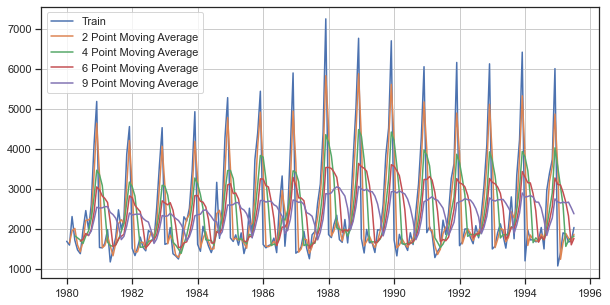

In [243]:
## Plotting on the whole data

plt.figure(figsize=(10,5))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label ='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [244]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape) 

(55, 7)
(132, 7)


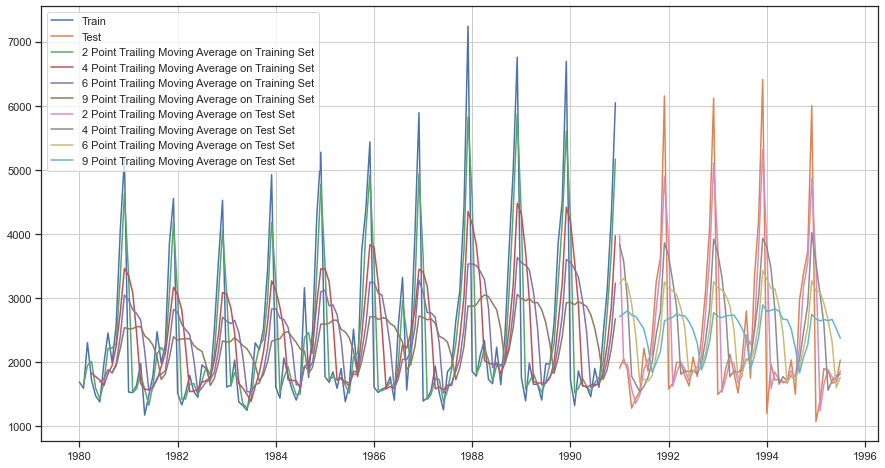

In [245]:
## Plotting on both the Training and Test data

plt.figure(figsize=(15,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [246]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [247]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            1275.867052
Naive Model                  3864.279352
Simple Average Model         1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

### Model 5: Simple Exponential Smoothing

In [248]:
SES_train = train.copy()
SES_test = test.copy()

In [249]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

In [250]:
model_SES_autofit = model_SES.fit(optimized=True)

In [251]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [252]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  2676.676366
1991-02-01   2049  1991      2  2676.676366
1991-03-01   1874  1991      3  2676.676366
1991-04-01   1279  1991      4  2676.676366
1991-05-01   1432  1991      5  2676.676366

In [253]:
resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [254]:
rresultsDf_5 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_5 = resultsDf_5.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

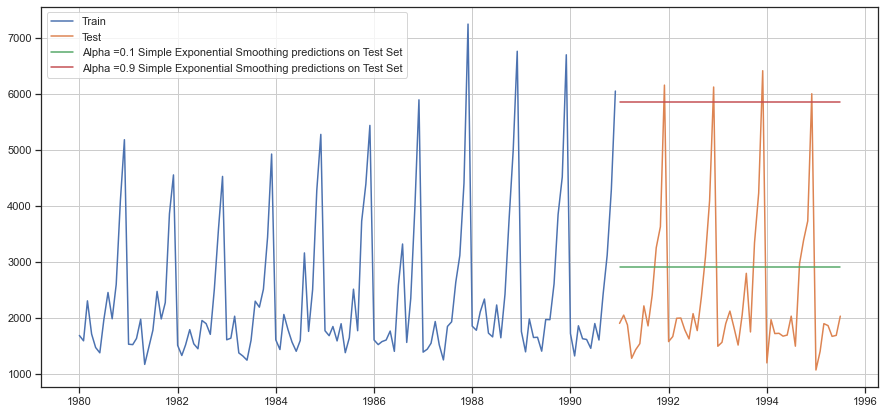

In [255]:
## Plotting on both the Training and Test data
plt.figure(figsize=(15,7))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [256]:
resultsDf_5.sort_values(by=['Test RMSE']).head(9)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

In [257]:
resultsDf_5.sort_values(by=['Test RMSE'],ascending=True)

resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                     1275.867052
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2pointTrailingMovingAverage            813.400684
4pointTrailingMovingAverage           1156.589694
6pointTrailingMovingAverage           1283.927428
9pointTrailingMovingAverage           1346.278315
Alpha=0.1,SimpleExponentialSmoothing  1375.393398

### Model 6: Double Exponential Smoothing (Holt's Model)

In [258]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
DES_train = train.copy()
DES_test = test.copy()

In [259]:
model_DES = Holt(DES_train['Sales'])

In [260]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

In [261]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [262]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  5221.278699
1991-02-01   2049  1991      2  5127.886554
1991-03-01   1874  1991      3  5034.494409
1991-04-01   1279  1991      4  4941.102264
1991-05-01   1432  1991      5  4847.710119

In [263]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [264]:
rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6887, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [265]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

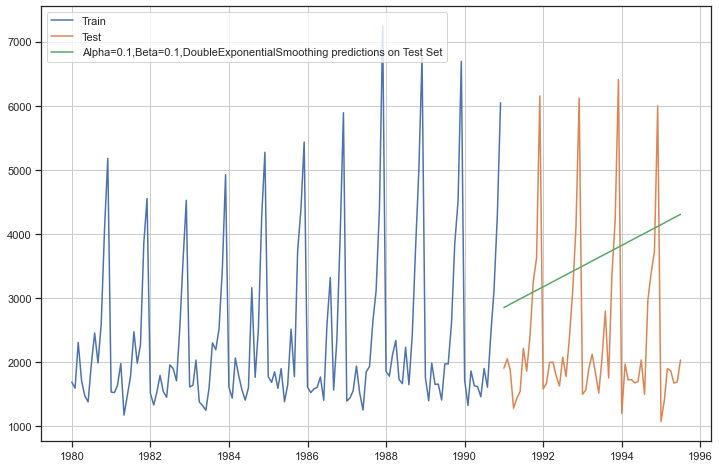

In [266]:
## Plotting on both the Training and Test data

plt.figure(figsize=(12,8))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [267]:
resultsDf_6.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554
3            0.1          0.4  1480.897776  6039.537339
11           0.2          0.2  1479.304667  6878.568717
4            0.1          0.5  1521.108657  7390.522201
30           0.4          0.1  1424.267932  8039.101904

In [268]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670

### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [269]:
TES_train = train.copy()
TES_test = test.copy()

In [270]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

In [271]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [272]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [273]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [274]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.11127217693511166,
 'smoothing_trend': 0.012360783126182025,
 'smoothing_seasonal': 0.4607177659431463,
 'damping_trend': nan,
 'initial_level': 2356.5783078812697,
 'initial_trend': -0.018442178724720648,
 'initial_seasons': array([-636.23349205, -722.98346399, -398.64349841, -473.43073157,
        -808.42502897, -815.35019273, -384.23061339,   72.99513671,
        -237.44278517,  272.32607144, 1541.37826596, 2590.07759442]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [275]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11101471561088701,
 'smoothing_trend': 0.0493145907614654,
 'smoothing_seasonal': 0.36244934537370843,
 'damping_trend': nan,
 'initial_level': 2356.496908624238,
 'initial_trend': -9.809526161838415,
 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
        0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
        1.87099202, 2.37505867]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [276]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11107068619440803,
 'smoothing_trend': 0.049364277175342766,
 'smoothing_seasonal': 0.36216155292352714,
 'damping_trend': nan,
 'initial_level': 2356.529810158899,
 'initial_trend': 0.9986312323184912,
 'initial_seasons': array([0.71947969, 0.69883147, 0.90054243, 0.81033279, 0.66897802,
        0.66976274, 0.87942872, 1.11688229, 0.90007942, 1.17672321,
        1.83838251, 2.34601867]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [277]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.11550735021168294,
 'smoothing_trend': 0.013346508713366055,
 'smoothing_seasonal': 0.4563371888246135,
 'damping_trend': nan,
 'initial_level': 2356.555090982173,
 'initial_trend': 0.9996257347482016,
 'initial_seasons': array([-690.77881384, -764.00148187, -298.81256914, -502.8606606 ,
        -861.15140166, -866.65636947, -386.01733851,  139.12522224,
        -307.37908686,  256.96842936, 1672.37250928, 2691.09506539]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [278]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa
YearMonth                                    
1991-01-01   1902  1991      1    1490.574618
1991-02-01   2049  1991      2    1204.714535
1991-03-01   1874  1991      3    1688.941336
1991-04-01   1279  1991      4    1551.451059
1991-05-01   1432  1991      5    1461.440697

In [279]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01   1902  1991      1    1490.574618    1587.923122
1991-02-01   2049  1991      2    1204.714535    1356.650595
1991-03-01   1874  1991      3    1688.941336    1763.350752
1991-04-01   1279  1991      4    1551.451059    1656.524633
1991-05-01   1432  1991      5    1461.440697    1542.386930

In [280]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01   1902  1991      1    1490.574618    1587.923122    1591.323941
1991-02-01   2049  1991      2    1204.714535    1356.650595    1360.442206
1991-03-01   1874  1991      3    1688.941336    1763.350752    1767.962324
1991-04-01   1279  1991      4    1551.451059    1656.524633    1661.642323
1991-05-01   1432  1991      5    1461.440697    1542.386930    1547.433163

In [281]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01   1902  1991      1    1490.574618    1587.923122    1591.323941   
1991-02-01   2049  1991      2    1204.714535    1356.650595    1360.442206   
1991-03-01   1874  1991      3    1688.941336    1763.350752    1767.962324   
1991-04-01   1279  1991      4    1551.451059    1656.524633    1661.642323   
1991-05-01   1432  1991      5    1461.440697    1542.386930    1547.433163   

            predict_tm_sa  
YearMonth                  
1991-01-01    1484.584329  
1991-02-01    1200.485522  
1991-03-01    1684.309722  
1991-04-01    1548.404207  
1991-05-01    1458.228945

In [282]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 378.626
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 402.936
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 380.382
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 378.699


In [283]:
resultsDf_rsme = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_rsme])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405

In [284]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_1

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [285]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)


In [286]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)


In [287]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)


In [288]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [289]:
TES_test.head()

Sales  Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01   1902  1991      1                     1671.894991   
1991-02-01   2049  1991      2                     1535.938082   
1991-03-01   1874  1991      3                     1882.992874   
1991-04-01   1279  1991      4                     1798.243923   
1991-05-01   1432  1991      5                     1576.572747   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                     1540.529588   
1991-02-01                     1354.094081   
1991-03-01                     1728.658127   
1991-04-01                     1638.281580   
1991-05-01                     1470.697707   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1472.827405   
1991-02-01                                     1236.723426   
1991-03-01                                     1644.294990   
1991-04-01                                     1535.922824   
1991-05-01                                     1394.544409   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                     1444.947521                     1440.100315   
1991-02-01                     1163.127303                     1118.381068   
1991-03-01                     1605.772780                     1593.658780   
1991-04-01                     1469.062420                     1424.230588   
1991-05-01                     1347.223962                     1324.218679   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                     1446.456719   
1991-02-01                     1091.681321   
1991-03-01                     1593.602194   
1991-04-01                     1393.229741   
1991-05-01                     1318.006765   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                    1456.102126  ...   
1991-02-01                                    1075.381082  ...   
1991-03-01                                    1595.700721  ...   
1991-04-01                                    1370.975056  ...   
1991-05-01                                    1319.843928  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-01                   -5.868610e+20                     1681.548575   
1991-02-01                   -1.101754e+23                     2493.688129   
1991-03-01                   -4.674701e+24                     3209.508652   
1991-04-01                   -5.266723e+25                     3046.434803   
1991-05-01                   -1.636152e+26                     2755.658417   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-01                     1003.861817   
1991-02-01                     1469.309964   
1991-03-01                     2499.957287   
1991-04-01                     2171.122226   
1991-05-01                     1623.114204   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1011.116778   
1991-02-01                                     1145.238568   
1991-03-01                                     2962.569457   
1991-04-01                                     3050.550334   
1991-05-01                                     2612.626803   

            (predict_tm_sa, 0.9, 0.9, 0.4)  (predict_tm_sa, 0.9, 0.9, 0.5)  \
YearMonth                                                                  

#### Model Evaluation

In [290]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE Method
1301           0.4          0.1           0.2  384.467709  317.434302  ta_sm
2245           0.4          0.1           0.3  381.106645  326.579641  tm_sm
1211           0.3          0.2           0.2  388.544148  329.037543  ta_sm
1200           0.3          0.1           0.1  388.220071  337.080969  ta_sm
1110           0.2          0.2           0.1  398.482510  340.186457  ta_sm

In [291]:
resultsDf_7_1_rsme = pd.DataFrame({'Test RMSE': [resultsDf_7_1.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1_rsme])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302

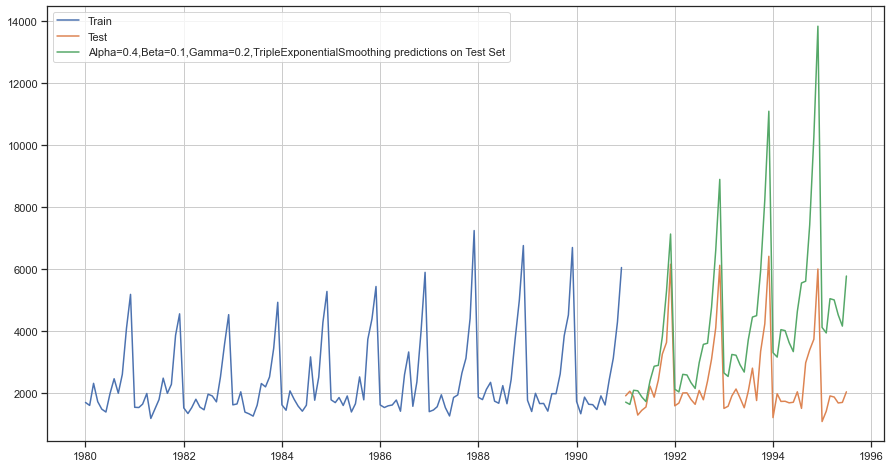

In [292]:
#  Best figures obtained for Trend = Multiplicative and Seasonality = Multiplicative
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(15,8))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.2, 0.1], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

### 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


#### Applying Augmented Dickey-Fuller test whether the series has unit and whether it is stationary or non-stationary.

Hypothesis for the ADF test:

H0 : The Time Series has a unit root and is thus non-stationary (Null Hypothesis)

H1 : The Time Series does not have a unit root and is thus stationary. (Alternate Hypothesis)

We see that for α = 5%, the Time Series is non-stationary.

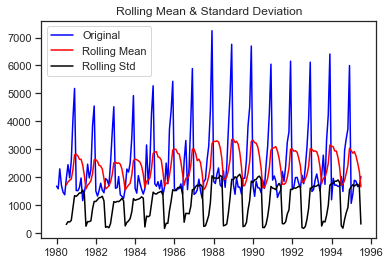

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [169]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(sdf['Sales'])

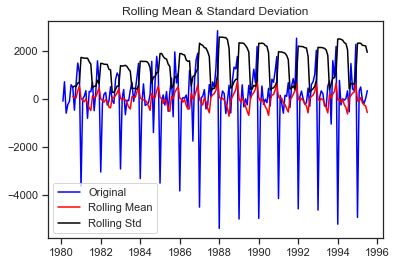

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [170]:
test_stationarity(sdf['Sales'].diff().dropna())

### 1.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Auto - Arima Model

In [171]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [172]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [173]:
from statsmodels.tsa.arima.model import ARIMA

In [174]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592223
ARIMA(0, 1, 2) - AIC:2234.4083231226628
ARIMA(0, 1, 3) - AIC:2233.994857735581
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.527200452125
ARIMA(1, 1, 3) - AIC:2235.6078154783027
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626228905
ARIMA(2, 1, 2) - AIC:2213.509212416925


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3) - AIC:2232.8112113956195
ARIMA(3, 1, 0) - AIC:2257.7233789979387
ARIMA(3, 1, 1) - AIC:2235.4988992974854


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2) - AIC:2230.825008517658
ARIMA(3, 1, 3) - AIC:2221.4616892285576


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [175]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.461689
14  (3, 1, 2)  2230.825009
11  (2, 1, 3)  2232.811211
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)    2234.5272
13  (3, 1, 1)  2235.498899
7   (1, 1, 3)  2235.607815
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [176]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 04 Jun 2023   AIC                           2213.509
Time:                        14:19:07   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

#### Predict on the Test Set using this model and evaluate the model.

In [177]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1299.9798208324635


In [178]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979821

#### SARIMA Model

In [179]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [180]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [181]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684592
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234275
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3788.8702234504462
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389272
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791694


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3102.146459235806
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415860455
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.98980539208


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2633.1403461999307
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625374
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064632


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:6506.405021012982
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850582
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566421
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572968055


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3446.263783179349
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838273
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193763033
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144283382
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3449.208102198681
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178712
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085449217
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.401882842353


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:5411.335971909487
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.460767961618
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727996569673
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.58892677946


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:6757.580984629763
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687527
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007201373
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789891716817


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:3608.879428475703
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332312022
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675070991748
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068883655


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3763.140576123555
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774455566
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.543882324784
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.121563157143


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:97.32576086530659
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407921233
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448370882657
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883835049841
SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:6684.6434005761585
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408440266
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770693815249
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973663132448
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3488.890655448558
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0301790973087
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404077981776
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418976005638


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3310.023440490174
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580749472
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674826698942
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.048623084692


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:5337.879658048997
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529470066337
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435177037645
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.041517634766


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:4792.492205700524
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990429
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354565


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3819.916998010865
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.244027933163
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359450557
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402563318


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3410.8071456238863
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128908
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132636154
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067498257
SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:6906.461698984744
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.513464035906
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780456383
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660401754947
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:6830.324045025012
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154564
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974130328
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352620624
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3668.1524369695253
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424470454335
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7120332231566
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863613458


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:14.0
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160687877
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.314223602769
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968338948
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:762.5881272265765
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112082534857
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502484748114
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.014906750192


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2776.6575954974087
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450505316
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.770830749747
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.629142144302
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3340.482381478013
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259802081927
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871795184658
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842467955563
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:2978.3784732669355
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216932039863
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1588.3226223496508
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1556.076771105998


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102394792497
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146974725286
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9983601260512


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:1753.661988427322
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.0264039778062
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.938150687233
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5217645823002


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3554.475054062371
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596428409
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.955491419717
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744598935619


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3334.2056516577063
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4154052138383
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3669040433742
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292693560897


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:917.9324231260896
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723333723507
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509686989736
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649247123563
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:22.0
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435407906
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039814451


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4352.438761088168
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066060363
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349663399
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204835598
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3350.3056926055147
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464844328
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344988118321
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191790344573


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:6798.180429438063
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.944972803059
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017620365355
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975674173393
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:6754.873131916587
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131455163
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496025843
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408032839


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3308.1342447433035
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429034113
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091125436165
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888279308175


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3594.617162306464
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896922
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1596300826325
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342867514582
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:6905.0723913488355
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673327192704
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.130756763638
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241452520028


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:4509.165141279203
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114771516
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372608758158
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432488512


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3698.0127624229713
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140935579478
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.3767693060447
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404017838243


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2060.2986845540727
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1599.9010784492957
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476005641451
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401586612067


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:20.0
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376150605267
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5036127016476
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4359759753154
SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:6688.300384993457
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395885242024
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.057322460649
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072842413427
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3798.4046618402176
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1759.045735131789
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1713.8648805048429
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5288459924948


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:2955.5162877378734
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6943736795815
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1573.7793379683308
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9471480476075


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:22.0
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.789854018017
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.992292205852
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.2788326924863
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:6607.8136424635695
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418917
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.508992317143
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3879.0924234123413
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703206
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783840837125
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471967386236


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3285.271016683126
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025569301
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812789888
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.68081982987
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:6921.783395987169
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.867862055817
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774715048866
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.307475987735
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:6681.658088140153
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220983400584
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690700826775
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.423405122954
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3879.490476702294
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222518696487
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.3085043480892
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844996111297


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3907.306871753966
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505331538
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.295662583854
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.349818747683
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:6905.4251925735425
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.788331371707
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814837567676
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959015497032
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:6681.609354091769
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.31472715611
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.7804323669582
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255040248673


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:5786.708392671617
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.963586595066
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.365040142282
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.3372577935645


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3338.109443707932
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.9501943827645
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894244078345
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.809164428267


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:22.0
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1400.9247380867641
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.602611792299
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.701996655722


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2202.7942510960147
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542045894
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1876.931112329866
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829946913935


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3696.3286642631383
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1755.7426296512904
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1715.7503603953535
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3969579607249


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:6394.62861513899
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1565.9762937909345
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9915683279542
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1551.9130792649553


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:481.3287318610489
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.4970044525373
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698614339145
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6926083859978


C:\Users\harih\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:6604.554857375581


In [182]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal   AIC
87   (1, 1, 1)  (1, 0, 3, 12)  14.0
107  (1, 1, 2)  (2, 0, 3, 12)  18.0
171  (2, 1, 2)  (2, 0, 3, 12)  20.0
127  (1, 1, 3)  (3, 0, 3, 12)  22.0
187  (2, 1, 3)  (2, 0, 3, 12)  22.0

In [183]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 04 Jun 2023   AIC                           1555.584
Time:                                    14:31:39   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

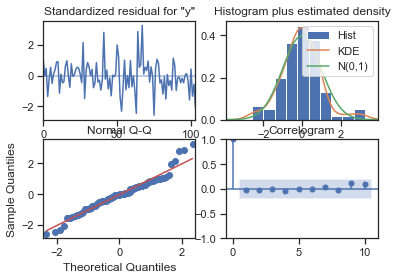

In [184]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [185]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.375899  388.345118     566.233454    2088.518344
1  1315.104624  402.008623     527.182201    2103.027047
2  1621.580264  402.002229     833.670373    2409.490155
3  1598.860501  407.240169     800.684437    2397.036565
4  1392.679913  407.970304     593.072810    2192.287015

In [186]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.6293052681265


In [187]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(1,1,1),(2,0,3,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979821
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.629305

### 1.8 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [188]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.629305
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Linear Regression                                   1275.867052
6pointTrailingMovingAverage                         1283.927428
Auto_ARIMA                                          1299.979821
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Naive Model                                         3864.279352

### 1.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [189]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [190]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [191]:
TES_train = sdf.copy()

In [192]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\harih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [193]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01        1988.782193
1995-09-01        2652.762887
1995-10-01        3483.872246
1995-11-01        4354.989747
1995-12-01        6900.103171
1996-01-01        1546.800546
1996-02-01        1981.361768
1996-03-01        2245.459724
1996-04-01        2151.066942
1996-05-01        1929.355815
1996-06-01        1830.619260
1996-07-01        2272.156151

In [194]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1213.490105  1988.782193  2764.074282
1995-09-01  1877.470798  2652.762887  3428.054975
1995-10-01  2708.580157  3483.872246  4259.164335
1995-11-01  3579.697659  4354.989747  5130.281836
1995-12-01  6124.811083  6900.103171  7675.395260

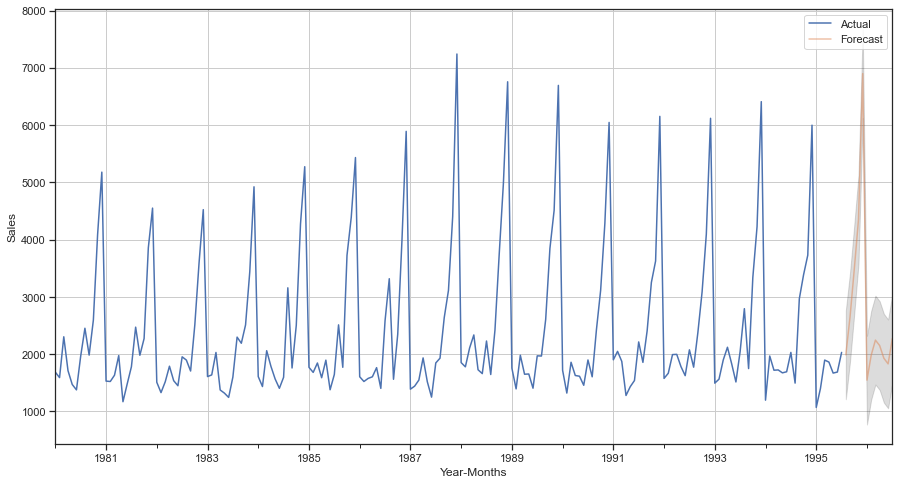

In [195]:
# plot the forecast along with the confidence band

axis = sdf['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()